In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data = pd.read_csv('Delinquency_prediction_dataset.csv')
data.head()

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,CUST0001,56,165580.0,398.0,0.390502,3,0,16310.0,0.317396,EMP,18,Student,Los Angeles,Late,Late,Missed,Late,Missed,Late
1,CUST0002,69,100999.0,493.0,0.312444,6,1,17401.0,0.196093,Self-employed,0,Standard,Phoenix,Missed,Missed,Late,Missed,On-time,On-time
2,CUST0003,46,188416.0,500.0,0.359930,0,0,13761.0,0.301655,Self-employed,1,Platinum,Chicago,Missed,Late,Late,On-time,Missed,Late
3,CUST0004,32,101672.0,413.0,0.371400,3,0,88778.0,0.264794,Unemployed,15,Platinum,Phoenix,Late,Missed,Late,Missed,Late,Late
4,CUST0005,60,38524.0,487.0,0.234716,2,0,13316.0,0.510583,Self-employed,11,Standard,Phoenix,Missed,On-time,Missed,Late,Late,Late


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           500 non-null    object 
 1   Age                   500 non-null    int64  
 2   Income                461 non-null    float64
 3   Credit_Score          498 non-null    float64
 4   Credit_Utilization    500 non-null    float64
 5   Missed_Payments       500 non-null    int64  
 6   Delinquent_Account    500 non-null    int64  
 7   Loan_Balance          471 non-null    float64
 8   Debt_to_Income_Ratio  500 non-null    float64
 9   Employment_Status     500 non-null    object 
 10  Account_Tenure        500 non-null    int64  
 11  Credit_Card_Type      500 non-null    object 
 12  Location              500 non-null    object 
 13  Month_1               500 non-null    object 
 14  Month_2               500 non-null    object 
 15  Month_3               5

In [4]:
data.describe()

,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Account_Tenure
count,500.000000,461.000000,498.000000,500.000000,500.000000,500.000000,471.000000,500.000000,500.000000
mean,46.266000,108379.893709,577.716867,0.491446,2.968000,0.160000,48654.428875,0.298862,9.740000
std,16.187629,53662.723741,168.881211,0.197103,1.946935,0.366973,29395.537273,0.094521,5.923054
min,18.000000,15404.000000,301.000000,0.050000,0.000000,0.000000,612.000000,0.100000,0.000000
25%,33.000000,62295.000000,418.250000,0.356486,1.000000,0.000000,23716.500000,0.233639,5.000000
50%,46.500000,107658.000000,586.000000,0.485636,3.000000,0.000000,45776.000000,0.301634,10.000000
75%,59.250000,155734.000000,727.250000,0.634440,5.000000,0.000000,75546.500000,0.362737,15.000000
max,74.000000,199943.000000,847.000000,1.025843,6.000000,1.000000,99620.000000,0.552956,19.000000


In [5]:
data.isna().sum()

Customer_ID              0
Age                      0
Income                  39
Credit_Score             2
Credit_Utilization       0
Missed_Payments          0
Delinquent_Account       0
Loan_Balance            29
Debt_to_Income_Ratio     0
Employment_Status        0
Account_Tenure           0
Credit_Card_Type         0
Location                 0
Month_1                  0
Month_2                  0
Month_3                  0
Month_4                  0
Month_5                  0
Month_6                  0
dtype: int64

In [6]:
data['Income'].fillna(data['Income'].median(), inplace=True)
data['Credit_Score'].fillna(data['Credit_Score'].median(), inplace=True)
data['Loan_Balance'].fillna(data['Loan_Balance'].median(), inplace=True)
data.isna().sum()

C:\Users\sudes\AppData\Local\Temp\ipykernel_6868\3781707756.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Income'].fillna(data['Income'].median(), inplace=True)
C:\Users\sudes\AppData\Local\Temp\ipykernel_6868\3781707756.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

Customer_ID             0
Age                     0
Income                  0
Credit_Score            0
Credit_Utilization      0
Missed_Payments         0
Delinquent_Account      0
Loan_Balance            0
Debt_to_Income_Ratio    0
Employment_Status       0
Account_Tenure          0
Credit_Card_Type        0
Location                0
Month_1                 0
Month_2                 0
Month_3                 0
Month_4                 0
Month_5                 0
Month_6                 0
dtype: int64

In [7]:
data['Employment_Status'].unique()

array(['EMP', 'Self-employed', 'Unemployed', 'employed', 'Employed',
       'retired'], dtype=object)

In [8]:
data['Employment_Status'] = data['Employment_Status'].replace(['Employed','employed','EMP'],'Employed')

In [9]:
from IPython.display import FileLink
data.to_csv('Processed_Delinquency_prediction_Dataset.csv', index=False)

FileLink('Processed_Delinquency_prediction_Dataset.csv')

D:\Desktop\Projects\End-to-end Project\Reduce high credit card delinquency rate\Processed_Delinquency_prediction_Dataset.csv

In [10]:
data.head()

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,CUST0001,56,165580.0,398.0,0.390502,3,0,16310.0,0.317396,Employed,18,Student,Los Angeles,Late,Late,Missed,Late,Missed,Late
1,CUST0002,69,100999.0,493.0,0.312444,6,1,17401.0,0.196093,Self-employed,0,Standard,Phoenix,Missed,Missed,Late,Missed,On-time,On-time
2,CUST0003,46,188416.0,500.0,0.359930,0,0,13761.0,0.301655,Self-employed,1,Platinum,Chicago,Missed,Late,Late,On-time,Missed,Late
3,CUST0004,32,101672.0,413.0,0.371400,3,0,88778.0,0.264794,Unemployed,15,Platinum,Phoenix,Late,Missed,Late,Missed,Late,Late
4,CUST0005,60,38524.0,487.0,0.234716,2,0,13316.0,0.510583,Self-employed,11,Standard,Phoenix,Missed,On-time,Missed,Late,Late,Late


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           500 non-null    object 
 1   Age                   500 non-null    int64  
 2   Income                500 non-null    float64
 3   Credit_Score          500 non-null    float64
 4   Credit_Utilization    500 non-null    float64
 5   Missed_Payments       500 non-null    int64  
 6   Delinquent_Account    500 non-null    int64  
 7   Loan_Balance          500 non-null    float64
 8   Debt_to_Income_Ratio  500 non-null    float64
 9   Employment_Status     500 non-null    object 
 10  Account_Tenure        500 non-null    int64  
 11  Credit_Card_Type      500 non-null    object 
 12  Location              500 non-null    object 
 13  Month_1               500 non-null    object 
 14  Month_2               500 non-null    object 
 15  Month_3               5

In [12]:
data.describe()

,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Account_Tenure
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,46.266000,108323.586000,577.750000,0.491446,2.968000,0.160000,48487.480000,0.298862,9.740000
std,16.187629,51523.389667,168.543244,0.197103,1.946935,0.366973,28536.522206,0.094521,5.923054
min,18.000000,15404.000000,301.000000,0.050000,0.000000,0.000000,612.000000,0.100000,0.000000
25%,33.000000,67610.500000,418.750000,0.356486,1.000000,0.000000,24847.000000,0.233639,5.000000
50%,46.500000,107658.000000,586.000000,0.485636,3.000000,0.000000,45776.000000,0.301634,10.000000
75%,59.250000,152572.250000,725.750000,0.634440,5.000000,0.000000,73809.500000,0.362737,15.000000
max,74.000000,199943.000000,847.000000,1.025843,6.000000,1.000000,99620.000000,0.552956,19.000000


In [13]:
data.isna().sum()

Customer_ID             0
Age                     0
Income                  0
Credit_Score            0
Credit_Utilization      0
Missed_Payments         0
Delinquent_Account      0
Loan_Balance            0
Debt_to_Income_Ratio    0
Employment_Status       0
Account_Tenure          0
Credit_Card_Type        0
Location                0
Month_1                 0
Month_2                 0
Month_3                 0
Month_4                 0
Month_5                 0
Month_6                 0
dtype: int64

In [14]:
data.duplicated().sum()

np.int64(0)

In [15]:
data['Credit_Card_Type'].unique()

array(['Student', 'Standard', 'Platinum', 'Gold', 'Business'],
      dtype=object)

In [16]:
data['Employment_Status'].unique()

array(['Employed', 'Self-employed', 'Unemployed', 'retired'], dtype=object)

In [17]:
data['Location'].unique()

array(['Los Angeles', 'Phoenix', 'Chicago', 'New York', 'Houston'],
      dtype=object)

In [18]:
data.isnull().sum()

Customer_ID             0
Age                     0
Income                  0
Credit_Score            0
Credit_Utilization      0
Missed_Payments         0
Delinquent_Account      0
Loan_Balance            0
Debt_to_Income_Ratio    0
Employment_Status       0
Account_Tenure          0
Credit_Card_Type        0
Location                0
Month_1                 0
Month_2                 0
Month_3                 0
Month_4                 0
Month_5                 0
Month_6                 0
dtype: int64

In [19]:
data.duplicated().sum()

np.int64(0)

In [20]:
data['Credit_Card_Type'] = data['Credit_Card_Type'].map({'Student':1, 'Standard':2, 'Platinum':3, 'Gold':4, 'Business':5})
data['Employment_Status'] = data['Employment_Status'].map({'Employed':1, 'Self-employed':2, 'Unemployed':3, 'retired':4})
data['Location'] = data['Location'].map({'Los Angeles':1, 'Phoenix':2, 'Chicago':3, 'New York':4, 'Houston':5})

In [21]:
data['Credit_Card_Type'].unique()

array([1, 2, 3, 4, 5])

In [22]:
data['Employment_Status'].unique()

array([1, 2, 3, 4])

In [23]:
data['Location'].unique()

array([1, 2, 3, 4, 5])

In [24]:
data.head()

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,CUST0001,56,165580.0,398.0,0.390502,3,0,16310.0,0.317396,1,18,1,1,Late,Late,Missed,Late,Missed,Late
1,CUST0002,69,100999.0,493.0,0.312444,6,1,17401.0,0.196093,2,0,2,2,Missed,Missed,Late,Missed,On-time,On-time
2,CUST0003,46,188416.0,500.0,0.359930,0,0,13761.0,0.301655,2,1,3,3,Missed,Late,Late,On-time,Missed,Late
3,CUST0004,32,101672.0,413.0,0.371400,3,0,88778.0,0.264794,3,15,3,2,Late,Missed,Late,Missed,Late,Late
4,CUST0005,60,38524.0,487.0,0.234716,2,0,13316.0,0.510583,2,11,2,2,Missed,On-time,Missed,Late,Late,Late


In [25]:
selected_cols = ['Age', 'Income', 'Credit_Score', 'Credit_Utilization', 'Missed_Payments', 'Loan_Balance' , 'Debt_to_Income_Ratio', 'Employment_Status', 'Account_Tenure', 'Credit_Card_Type', 'Location', 'Delinquent_Account']
encoded = data[selected_cols]
encoded.head()

,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Delinquent_Account
0,56,165580.0,398.0,0.390502,3,16310.0,0.317396,1,18,1,1,0
1,69,100999.0,493.0,0.312444,6,17401.0,0.196093,2,0,2,2,1
2,46,188416.0,500.0,0.359930,0,13761.0,0.301655,2,1,3,3,0
3,32,101672.0,413.0,0.371400,3,88778.0,0.264794,3,15,3,2,0
4,60,38524.0,487.0,0.234716,2,13316.0,0.510583,2,11,2,2,0


In [26]:
encoded.duplicated().sum()

np.int64(0)

In [27]:
encoded.shape

(500, 12)

In [28]:
encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   500 non-null    int64  
 1   Income                500 non-null    float64
 2   Credit_Score          500 non-null    float64
 3   Credit_Utilization    500 non-null    float64
 4   Missed_Payments       500 non-null    int64  
 5   Loan_Balance          500 non-null    float64
 6   Debt_to_Income_Ratio  500 non-null    float64
 7   Employment_Status     500 non-null    int64  
 8   Account_Tenure        500 non-null    int64  
 9   Credit_Card_Type      500 non-null    int64  
 10  Location              500 non-null    int64  
 11  Delinquent_Account    500 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 47.0 KB


In [29]:
encoded.describe()

,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Delinquent_Account
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,46.266000,108323.586000,577.750000,0.491446,2.968000,48487.480000,0.298862,2.054000,9.740000,3.048000,2.930000,0.160000
std,16.187629,51523.389667,168.543244,0.197103,1.946935,28536.522206,0.094521,1.166965,5.923054,1.473104,1.416019,0.366973
min,18.000000,15404.000000,301.000000,0.050000,0.000000,612.000000,0.100000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,33.000000,67610.500000,418.750000,0.356486,1.000000,24847.000000,0.233639,1.000000,5.000000,2.000000,2.000000,0.000000
50%,46.500000,107658.000000,586.000000,0.485636,3.000000,45776.000000,0.301634,2.000000,10.000000,3.000000,3.000000,0.000000
75%,59.250000,152572.250000,725.750000,0.634440,5.000000,73809.500000,0.362737,3.000000,15.000000,4.000000,4.000000,0.000000
max,74.000000,199943.000000,847.000000,1.025843,6.000000,99620.000000,0.552956,4.000000,19.000000,5.000000,5.000000,1.000000


In [30]:
encoded['Delinquent_Account'].unique()

array([0, 1])

In [31]:
# Split dataset into indendent and dependent features
df = encoded.copy()
# df = df.sample(frac=1, random_state=42).reset_index(drop=True)

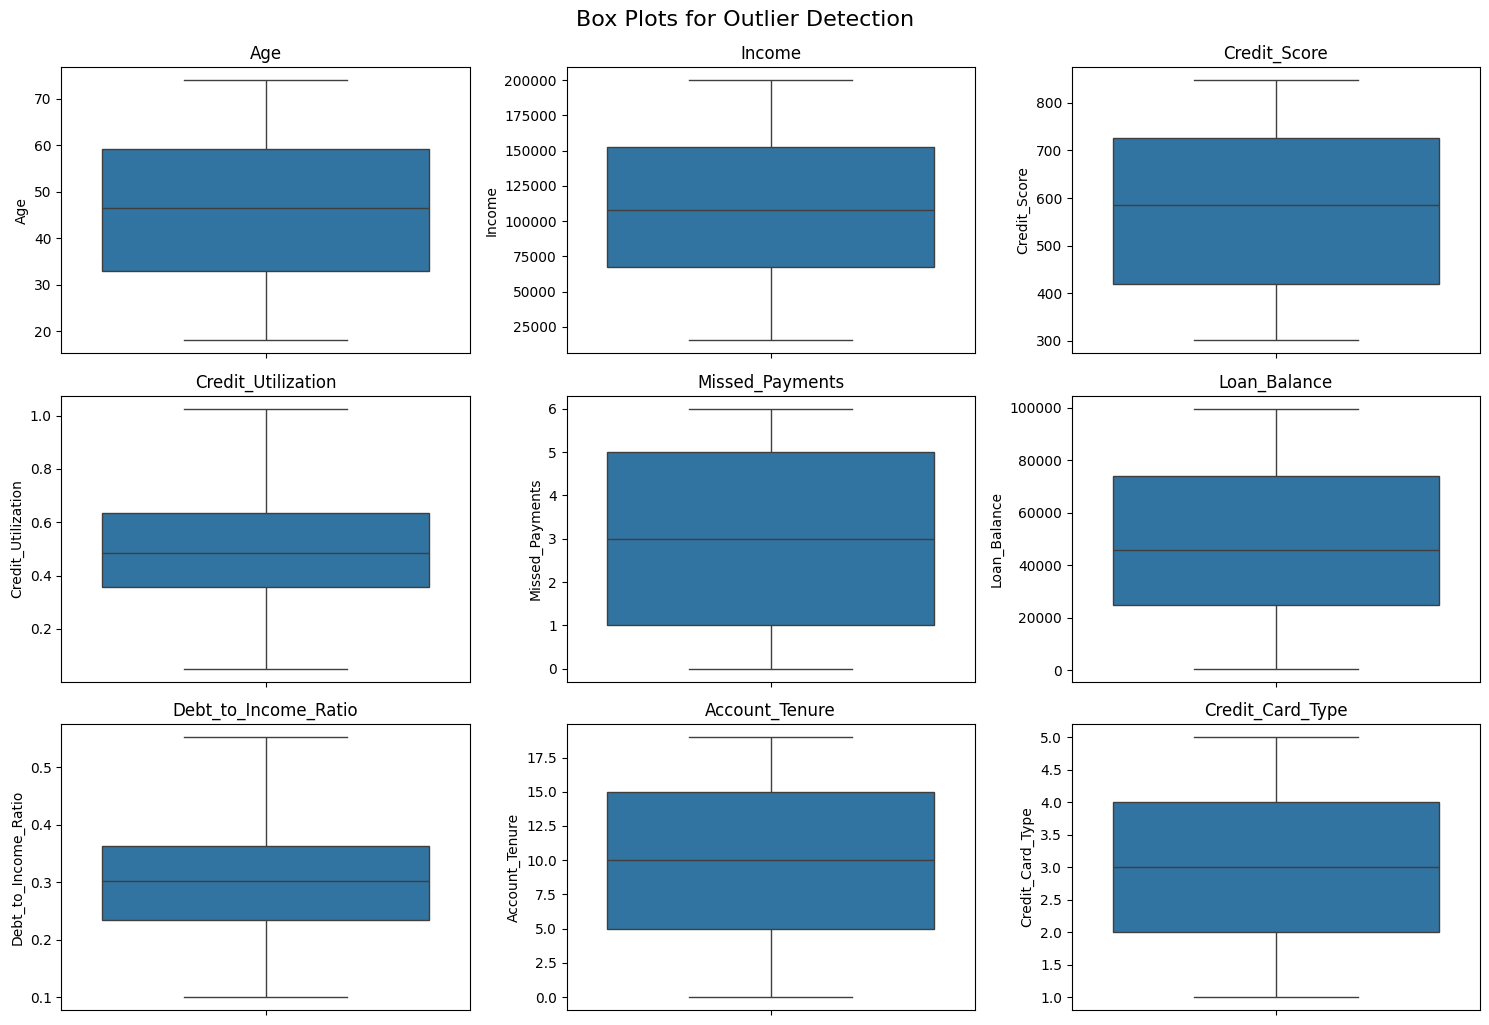

In [32]:
# List of numeric features to check
selected_cols = ['Age', 'Income', 'Credit_Score', 'Credit_Utilization', 'Missed_Payments', 'Loan_Balance' , 'Debt_to_Income_Ratio', 'Account_Tenure', 'Credit_Card_Type']
# Set plot size
plt.figure(figsize=(15, 10))

# Loop through each numeric feature and plot boxplots
for i, col in enumerate(selected_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Box Plots for Outlier Detection", fontsize=16, y=1.02)
plt.show()


In [33]:
# Correlation
df.corr()

,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Delinquent_Account
Age,1.000000,0.006095,-0.033949,0.015811,-0.023511,-0.049328,-0.007883,0.040081,0.016942,-0.009109,-0.027338,0.022508
Income,0.006095,1.000000,0.068362,0.038840,-0.004701,-0.047780,-0.061452,0.009030,-0.004712,-0.006283,0.050288,0.043991
Credit_Score,-0.033949,0.068362,1.000000,-0.021297,-0.014596,-0.014023,-0.005324,-0.007756,-0.036916,0.015191,-0.051101,0.034733
Credit_Utilization,0.015811,0.038840,-0.021297,1.000000,0.019666,-0.051570,-0.064661,-0.017422,0.065264,0.021840,-0.009912,0.034224
Missed_Payments,-0.023511,-0.004701,-0.014596,0.019666,1.000000,-0.015141,0.000148,-0.050396,-0.097345,0.004030,-0.041521,-0.026478
Loan_Balance,-0.049328,-0.047780,-0.014023,-0.051570,-0.015141,1.000000,0.058261,0.024677,0.052733,-0.009369,0.082446,-0.005438
Debt_to_Income_Ratio,-0.007883,-0.061452,-0.005324,-0.064661,0.000148,0.058261,1.000000,-0.037053,0.026144,0.008510,0.025094,0.034386
Employment_Status,0.040081,0.009030,-0.007756,-0.017422,-0.050396,0.024677,-0.037053,1.000000,0.004065,0.032296,-0.013474,-0.024895
Account_Tenure,0.016942,-0.004712,-0.036916,0.065264,-0.097345,0.052733,0.026144,0.004065,1.000000,-0.027277,-0.043272,-0.039829
Credit_Card_Type,-0.009109,-0.006283,0.015191,0.021840,0.004030,-0.009369,0.008510,0.032296,-0.027277,1.000000,-0.018561,0.030250


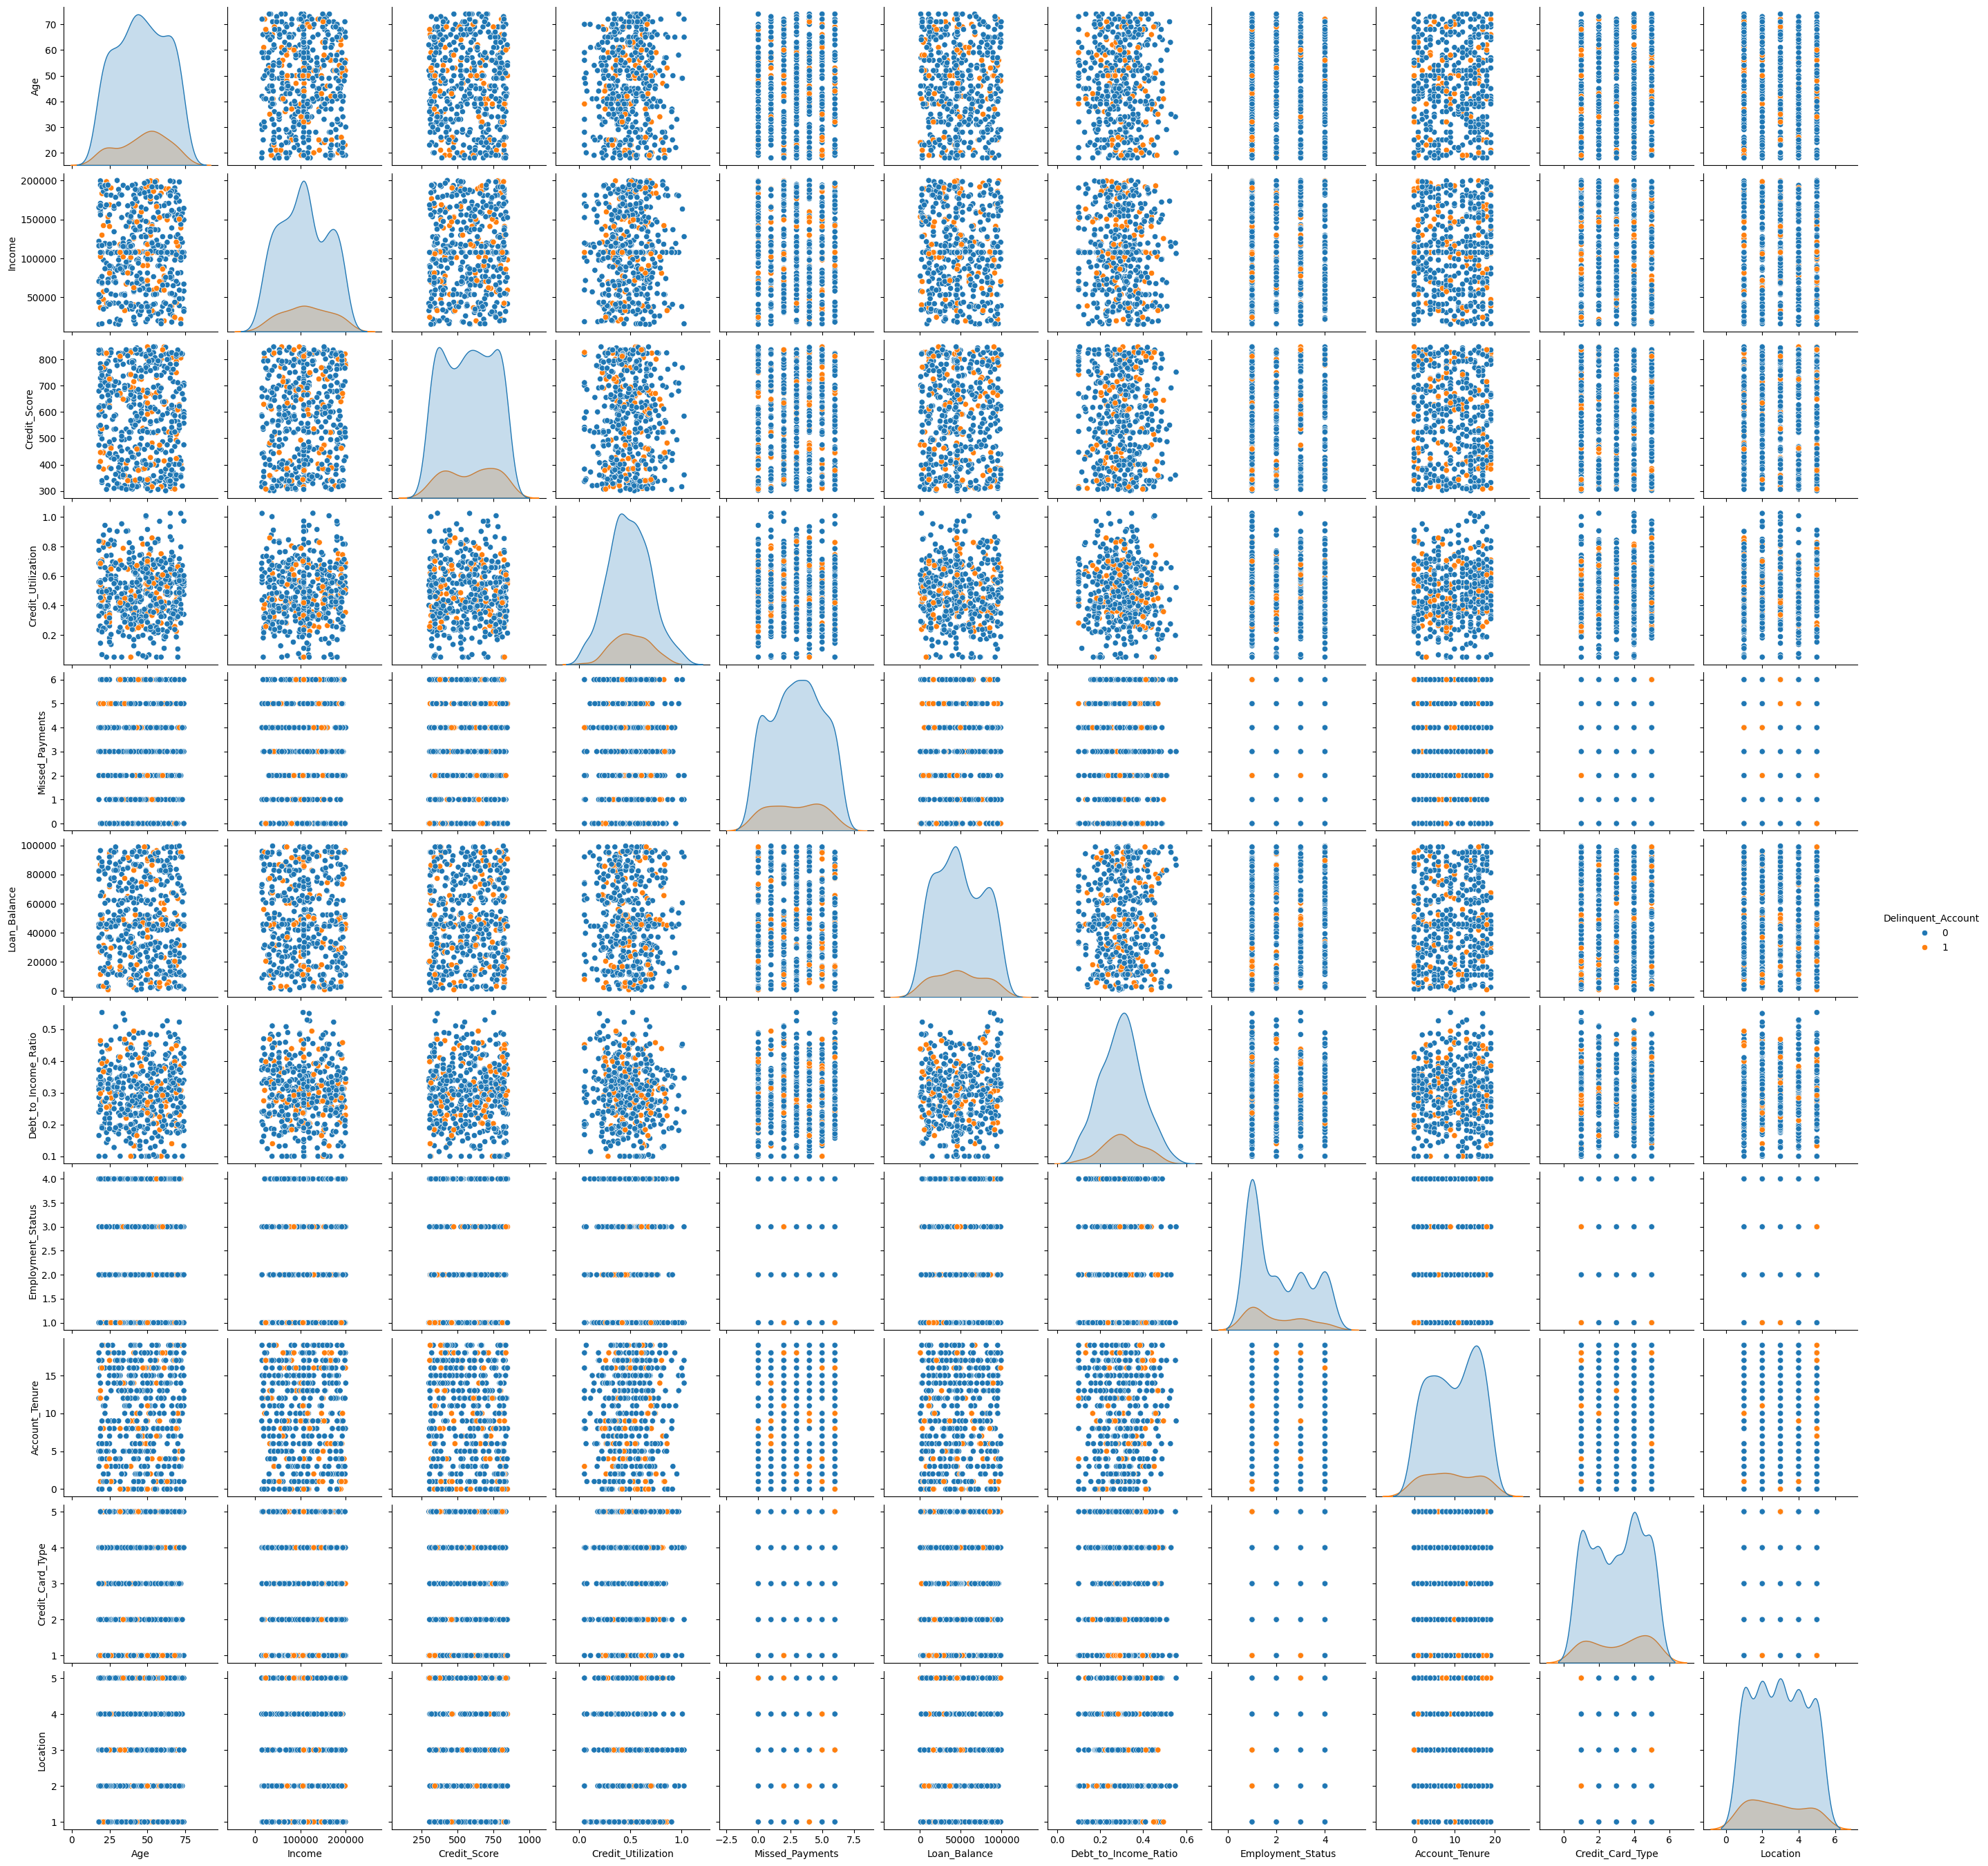

In [34]:
#EDA
sns.pairplot(df, hue='Delinquent_Account')
plt.show()

In [35]:
x = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [36]:
x

,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location
0,56,165580.0,398.0,0.390502,3,16310.0,0.317396,1,18,1,1
1,69,100999.0,493.0,0.312444,6,17401.0,0.196093,2,0,2,2
2,46,188416.0,500.0,0.359930,0,13761.0,0.301655,2,1,3,3
3,32,101672.0,413.0,0.371400,3,88778.0,0.264794,3,15,3,2
4,60,38524.0,487.0,0.234716,2,13316.0,0.510583,2,11,2,2
...,...,...,...,...,...,...,...,...,...,...,...
495,71,48307.0,688.0,0.486522,2,12707.0,0.373033,4,9,5,2
496,60,86180.0,836.0,0.608174,2,45595.0,0.291943,3,18,1,5
497,54,152326.0,847.0,0.676950,0,44449.0,0.104839,1,16,1,2
498,50,105852.0,343.0,0.700643,2,11155.0,0.236477,1,11,1,2


In [37]:
x.shape

(500, 11)

In [38]:
y

0      0
1      1
2      0
3      0
4      0
      ..
495    0
496    1
497    0
498    1
499    0
Name: Delinquent_Account, Length: 500, dtype: int64

In [39]:
y.shape

(500,)

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.20, random_state=42)

In [41]:
classifier = LogisticRegression()

In [42]:
parameter = {'penalty': ['l1', 'l2', 'elasticnet']}

In [43]:
classifier_regressor = GridSearchCV(classifier, param_grid=parameter, scoring='accuracy', cv=5)

In [44]:
classifier_regressor.fit(x_train, y_train)

C:\Users\sudes\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sudes\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/mod

,estimator,LogisticRegression()
,param_grid,"{'penalty': ['l1', 'l2', ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [45]:
print(classifier_regressor.best_params_)

{'penalty': 'l2'}


In [46]:
print(classifier_regressor.best_score_)

0.835


In [47]:
# Prediction
y_pred = classifier_regressor.predict(x_test)

In [48]:
score = accuracy_score(y_pred, y_test)
print(score)

0.86


In [49]:
print(classification_report(y_pred, y_test))

C:\Users\sudes\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\sudes\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\sudes\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape

              precision    recall  f1-score   support

           0       1.00      0.86      0.92       100
           1       0.00      0.00      0.00         0

    accuracy                           0.86       100
   macro avg       0.50      0.43      0.46       100
weighted avg       1.00      0.86      0.92       100

